In [1]:
### CSE353 HW 5 OVA/OVO Multi-class Classification
### Yajie Wang
import numpy as  np
import matplotlib.pyplot as plt
import math

# sign function which returns the sign of the input
def sign(a):
    if (a>0):
        return 1
    elif (a<0): 
        return -1
    else:
        return 0

# sigmoid function
def sigmoidFunction(x):
    return 1/(1+math.exp(-(x)))

# getGradient function to return the gradient
def getGradient(y,w,x):
    g = 0
    for i in range(len(y)):
        g += sigmoidFunction( -y[i] * np.dot(w.T,x[i])) * (y[i] * x[i])
    return g / len(y)

# getNorm function to return the Norm
def getNorm(w):
    n = 0
    for i in range(len(w)):
        n += w[i] * w[i]
    return n;

# load the dataset
x = np.loadtxt('/Users/yajiewang/Downloads/cse353hw5/X.txt', delimiter=',').T
y = np.loadtxt('/Users/yajiewang/Downloads/cse353hw5/Y.txt', delimiter=',')

# adjustable maximun iteration times and epsilon
E = 0.00001
i_max = 10000
### End of initialization

Error rate:  0.0125


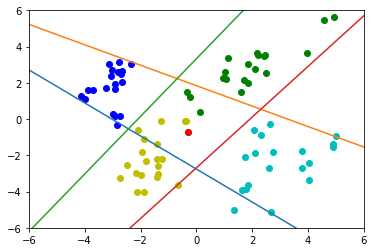

In [2]:
### Part 1. Use the One-Versus-All (OVA) strategy to implement the multi-class classification.
# set the ground truth y of the binary classification for 4 different classes
# class 1
y1 = y.copy()
for i in range(len(y)):
    if(y1[i] == 1):
        y1[i] = 1
    else:
        y1[i] = -1

# class 2
y2 = y.copy()
for i in range(len(y)):
    if(y2[i] == 2):
        y2[i] = 1
    else:
        y2[i] = -1
        
# class 3
y3 = y.copy()
for i in range(len(y)):
    if(y3[i] == 3):
        y3[i] = 1
    else:
        y3[i] = -1
        
# class 4
y4 = y.copy()
for i in range(len(y)):
    if(y4[i] == 4):
        y4[i] = 1
    else:
        y4[i] = -1

# print(class1, "\n", class2, "\n", class3, "\n", class4)

# calculate w's with logistic regression
w1 = np.zeros(3)
for i in range(0,i_max):
    curGradient = getGradient(y1,w1,x)
    w1 = w1 + curGradient
    if getNorm(curGradient) < E:
#         print("i:",i)
        break

w2 = np.zeros(3)
for i in range(0,i_max):
    curGradient = getGradient(y2,w2,x)
    w2 = w2 + curGradient
    if getNorm(curGradient) < E:
#         print("i:",i)
        break
        
w3 = np.zeros(3)
for i in range(0,i_max):
    curGradient = getGradient(y3,w3,x)
    w3 = w3 + curGradient
    if getNorm(curGradient) < E:
#         print("i:",i)
        break
        
w4 = np.zeros(3)
for i in range(0,i_max):
    curGradient = getGradient(y4,w4,x)
    w4 = w4 + curGradient
    if getNorm(curGradient) < E:
#         print("i:",i)
        break
        
# print(w1,"\n",w2,"\n",w3,"\n",w4)

# Error rate
error = 0
x1_error = list()
x2_error = list()
for t in range(len(y)):
    x_train = x[t]
    y_train = y[t]
    p1 = sigmoidFunction(np.dot(w1.T, x_train))
    p2 = sigmoidFunction(np.dot(w2.T, x_train))
    p3 = sigmoidFunction(np.dot(w3.T, x_train))
    p4 = sigmoidFunction(np.dot(w4.T, x_train))
    p_list = [p1,p2,p3,p4]
    p_highest = max(p_list)
#     print(p_highest)
    if (p1 == p_highest):
        y_predict = 1
    elif (p2 == p_highest):
        y_predict = 2
    elif (p3 == p_highest):
        y_predict = 3
    else:
        y_predict = 4
    
    if (y_predict != y_train):
        error += 1
        x1_error.append(x_train[1])
        x2_error.append(x_train[2])
    

print("Error rate: " , error/len(y))

# Plot the data, decision boundary lines, and misclassified points (color in red) 
x1_class1 = []
x2_class1 = []
x1_class2 = []
x2_class2 = []
x1_class3 = []
x2_class3 = []
x1_class4 = []
x2_class4 = []
x1_neg = []
x2_neg = []

for t in range(len(y)):
    if y[t] == 1:
        x1_class1.append(x[t][1])
        x2_class1.append(x[t][2])
    elif y[t] == 2:
        x1_class2.append(x[t][1])
        x2_class2.append(x[t][2])
    elif y[t] == 3:
        x1_class3.append(x[t][1])
        x2_class3.append(x[t][2])
    else:
        x1_class4.append(x[t][1])
        x2_class4.append(x[t][2])

# data points

plt.scatter(x1_class1, x2_class1, color='y')
plt.scatter(x1_class2, x2_class2, color='g')
plt.scatter(x1_class3, x2_class3, color='b')
plt.scatter(x1_class4, x2_class4, color='c')
plt.scatter(x1_error, x2_error, color='r')

k = 6
# decision boundary lines
a1 = ( (-1) * w1[0] - w1[1] * (-k) ) / w1[2]
b1 = ( (-1) * w1[0] - w1[1] * k) / w1[2]
a2 = ( (-1) * w2[0] - w2[1] * (-k) ) / w2[2]
b2 = ( (-1) * w2[0] - w2[1] * k) / w2[2]
a3 = ( (-1) * w3[0] - w3[1] * (-k) ) / w3[2]
b3 = ( (-1) * w3[0] - w3[1] * k) / w3[2]
a4 = ( (-1) * w4[0] - w4[1] * (-k) ) / w4[2]
b4 = ( (-1) * w4[0] - w4[1] * k) / w4[2]

plt.plot([-k,k],[a1, b1])
plt.plot([-k,k],[a2, b2])
plt.plot([-k,k],[a3, b3])
plt.plot([-k,k],[a4, b4])

plt.xlim(-k, k)
plt.ylim(-k, k)
plt.show()
### End of Part 1

Error rate:  0.0125


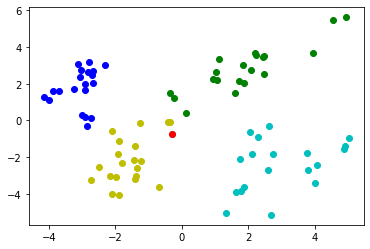

In [3]:
### Part 2. Use the One-Versus-One (OVO) strategy to implement the multi-class classification.
# split the training data X into 4 classes
x1 = x[0:20]
x2 = x[20:40]
x3 = x[40:60]
x4 = x[60:80]
# print(x)        
# print(x1,"\n",x2,"\n", x3, "\n", x4)
# set the ground truth y of the binary classification
y_ground_truth = np.zeros(40)
for i in range(0,40):
    if i < 20:
        y_ground_truth[i] = 1
    else:
        y_ground_truth[i] = -1

# class 1 vs. class 2
w_1vs2 = np.zeros(3)
x_1vs2 = np.concatenate((x1, x2), axis=0)
for i in range(0,i_max):
    curGradient = getGradient(y_ground_truth,w_1vs2,x_1vs2)
    w_1vs2 = w_1vs2 + curGradient
    if getNorm(curGradient) < E:
        break

# class 1 vs. class 3
w_1vs3 = np.zeros(3)
x_1vs3 = np.concatenate((x1, x3), axis=0)
for i in range(0,i_max):
    curGradient = getGradient(y_ground_truth,w_1vs3,x_1vs3)
    w_1vs3 = w_1vs3 + curGradient
    if getNorm(curGradient) < E:
        break

# class 1 vs. class 4
w_1vs4 = np.zeros(3)
x_1vs4 = np.concatenate((x1, x4), axis=0)
for i in range(0,i_max):
    curGradient = getGradient(y_ground_truth,w_1vs4,x_1vs4)
    w_1vs4 = w_1vs4 + curGradient
    if getNorm(curGradient) < E:
        break

# class 2 vs. class 3
w_2vs3 = np.zeros(3)
x_2vs3 = np.concatenate((x2, x3), axis=0)
for i in range(0,i_max):
    curGradient = getGradient(y_ground_truth,w_2vs3,x_2vs3)
    w_2vs3 = w_2vs3 + curGradient
    if getNorm(curGradient) < E:
        break

# class 2 vs. class 4
w_2vs4 = np.zeros(3)
x_2vs4 = np.concatenate((x2, x4), axis=0)
for i in range(0,i_max):
    curGradient = getGradient(y_ground_truth,w_2vs4,x_2vs4)
    w_2vs4 = w_2vs4 + curGradient
    if getNorm(curGradient) < E:
        break

# class 3 vs. class 4
w_3vs4 = np.zeros(3)
x_3vs4 = np.concatenate((x3, x4), axis=0)
for i in range(0,i_max):
    curGradient = getGradient(y_ground_truth,w_3vs4,x_3vs4)
    w_3vs4 = w_3vs4 + curGradient
    if getNorm(curGradient) < E:
        break

# Error rate
error = 0
x1_error = list()
x2_error = list()
for t in range(len(y)):
    x_train = x[t]
    y_train = y[t]
    p12 = sigmoidFunction(np.dot(w_1vs2.T, x_train))
    p13 = sigmoidFunction(np.dot(w_1vs3.T, x_train))
    p14 = sigmoidFunction(np.dot(w_1vs4.T, x_train))
    p23 = sigmoidFunction(np.dot(w_2vs3.T, x_train))
    p24 = sigmoidFunction(np.dot(w_2vs4.T, x_train))
    p34 = sigmoidFunction(np.dot(w_3vs4.T, x_train))
    p1 = p12 + p13 + p14
    p2 = 1-p12 + p23 + p24
    p3 = 1-p13 + 1-p23 + p34
    p4 = 1-p14 + 1-p24 + 1-p34
    p_list = [p1,p2,p3,p4]
    p_highest = max(p_list)
#     print(p_highest)
    if (p1 == p_highest):
        y_predict = 1
    elif (p2 == p_highest):
        y_predict = 2
    elif (p3 == p_highest):
        y_predict = 3
    else:
        y_predict = 4
    
    if (y_predict != y_train):
        error += 1
        x1_error.append(x_train[1])
        x2_error.append(x_train[2])
    

print("Error rate: " , error/len(y))

# Plot the data and hightlight the misclassified points (color in red) 
plt.scatter(x1_class1, x2_class1, color='y')
plt.scatter(x1_class2, x2_class2, color='g')
plt.scatter(x1_class3, x2_class3, color='b')
plt.scatter(x1_class4, x2_class4, color='c')
plt.scatter(x1_error, x2_error, color='r')

plt.show()
### End of Part 2